# Selección y limpieza de datos
- Miranda Eugenia Colorado Arróniz A01737027
- Ciudad escogida: Hawaii

### 1. Eliminar las columnas o variables no relevantes al dominio o contexto del proyecto

In [2]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Carga el CSV
df = pd.read_csv('listings.csv.gz', compression='gzip')
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (36125, 79)


In [4]:
# 50 variables más importantes
columnas_seleccionadas = [
    'id', 'listing_url', 'name', 'neighborhood_overview',
    'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
    'host_location', 'host_about', 'host_response_time', 'host_response_rate',
    'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count',
    'host_verifications', 'host_identity_verified','price', 'minimum_nights',
    'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','has_availability',
    'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'calendar_updated','number_of_reviews',
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
    'last_review', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'instant_bookable',
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'
]

# Nuevo Dataframe con las columnas seleccionadas
df_filtrado = df[columnas_seleccionadas]
print("Dimensiones del dataset filtrado:", df_filtrado.shape)
display(df_filtrado)

Dimensiones del dataset filtrado: (36125, 50)


,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI",...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI",...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI",...,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0
3,5532,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,NaN,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,"Waialua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,NaN,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,t,61,61,0,0
36121,1369824863578661367,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,"Hawaii, United States",...,NaN,NaN,NaN,NaN,NaN,t,548,540,8,0
36122,1369841764486904562,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,"Honolulu, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
36123,1369865927101822261,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,"Kailua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0


In [5]:
output_file = 'Filtrado.csv'
df_filtrado.to_csv(output_file, index=False)

### 2. Restablecer los índices si es necesario con identificadores adecuados.

In [21]:
df_reindexado = df_filtrado.reset_index(drop=True)
display(df_reindexado.head())

,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI",...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI",...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI",...,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0
3,5532,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,NaN,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,"Waialua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0


### 3. Seleccionar o filtrar los registros u observaciones de interés para operar dataframes de menor complejidad.

#### a) Los registros de 5 “host name” diferentes

In [7]:
host_names = df_reindexado['host_name'].dropna().unique()[:5]
filtro_a = df_reindexado[df_reindexado['host_name'].isin(host_names)].drop_duplicates(subset='host_name')
filtro_a = filtro_a.head(5)
print('Filtrado por 5 host_name diferentes. Variables filtradas: host_name')
filtro_a.head()

Filtrado por 5 host_name diferentes. Variables filtradas: host_name


,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI",...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI",...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI",...,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0
3,5532,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,NaN,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,"Waialua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0


#### b) Los registros de los host que se hallan unido a Airbnb “despues del año 2020”

In [8]:
df_reindexado['host_since'] = pd.to_datetime(df_reindexado['host_since'], errors='coerce')
filtro_b = df_reindexado[df_reindexado['host_since'].dt.year > 2020]
print('Filtrado por hosts que se unieron después de 2020. Variables filtradas: host_since')
filtro_b.head()

Filtrado por hosts que se unieron después de 2020. Variables filtradas: host_since


,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
2794,15305016,https://www.airbnb.com/rooms/15305016,Great 2BR Condo w/ Views of Diamond Head &Ocean!,The neighborhood is perfect for a peaceful Haw...,https://a0.muscache.com/pictures/a56b605f-52e8...,567743493,https://www.airbnb.com/users/show/567743493,Steve,2024-03-18,"Herriman, UT",...,4.56,4.75,4.85,4.91,4.72,f,1,1,0,0
3539,17750256,https://www.airbnb.com/rooms/17750256,Oceanfront Studio in Lahaina Shores,We are walking distance to the historic town o...,https://a0.muscache.com/pictures/198c0b4b-d623...,427316857,https://www.airbnb.com/users/show/427316857,Ana,2021-10-14,NaN,...,4.96,4.97,4.93,4.98,4.83,t,1,1,0,0
3969,19365742,https://www.airbnb.com/rooms/19365742,Waikiki Condo with Mesmerizing Ocean View/Ala wai,Gateway to world famous Waikīkī area.,https://a0.muscache.com/pictures/hosting/Hosti...,461905249,https://www.airbnb.com/users/show/461905249,Hsin-Ju,2022-05-31,"Honolulu, HI",...,4.66,4.75,4.81,4.78,4.61,f,4,4,0,0
4175,20286841,https://www.airbnb.com/rooms/20286841,"LovelyCondo 2Bedroom,2bath,Free Parking at Wai...",Neighborhood information: <br />The property i...,https://a0.muscache.com/pictures/miso/Hosting-...,520584192,https://www.airbnb.com/users/show/520584192,Aaron,2023-06-18,NaN,...,4.86,4.90,4.88,4.93,4.81,f,2,2,0,0
4275,20528825,https://www.airbnb.com/rooms/20528825,Kailua Beach Park - 1 BR Cottage,The area at the Lanikai end of Kailua Beach Pa...,https://a0.muscache.com/pictures/235e4bdb-7f39...,424895275,https://www.airbnb.com/users/show/424895275,Brooke,2021-09-27,"Kailua, HI",...,4.88,4.94,4.96,4.97,4.70,f,2,2,0,0


#### c) Los registros de los host que responden “a más tardar en 1 día”

In [9]:
filtro_c = df_reindexado[df_reindexado['host_response_time'].str.contains('day', case=False, na=False)]
print('Filtrado por hosts que responden a más tardar en 1 día. Variables filtradas: host_response_time')
filtro_c.head()

Filtrado por hosts que responden a más tardar en 1 día. Variables filtradas: host_response_time


,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
9,220361,https://www.airbnb.com/rooms/220361,Stunning Loft with 35 ft deck,NaN,https://a0.muscache.com/pictures/1974665/b0ab4...,855180,https://www.airbnb.com/users/show/855180,Jill Leilani,2011-07-22,"Honolulu, HI",...,3.86,4.78,4.61,4.69,4.42,f,1,1,0,0
10,222203,https://www.airbnb.com/rooms/222203,Ka'awa Loa Plantation Guesthouse,"Fantastic location, with easy access to Kealak...",https://a0.muscache.com/pictures/37397452/31e9...,158713,https://www.airbnb.com/users/show/158713,Michael,2010-07-05,"Captain Cook, HI",...,4.98,4.98,4.94,4.95,4.95,f,3,0,3,0
53,23814,https://www.airbnb.com/rooms/23814,HawaiianJungleHangout,NaN,https://a0.muscache.com/pictures/125914/06b4b9...,94828,https://www.airbnb.com/users/show/94828,Liz,2010-03-17,"San Francisco, CA",...,4.57,4.88,4.83,4.67,4.85,f,2,2,0,0
54,24119,https://www.airbnb.com/rooms/24119,Hawaiian Jungle Hut,NaN,https://a0.muscache.com/pictures/839441/ea36d8...,94828,https://www.airbnb.com/users/show/94828,Liz,2010-03-17,"San Francisco, CA",...,4.55,4.81,4.81,4.50,4.77,f,2,2,0,0


#### d) Los registros de las filas “Múltiplos de 200… (400, 600, 800, etc.)”

In [10]:
filtro_d = df_reindexado[df_reindexado.index % 200 == 0]
filtro_d = filtro_d[filtro_d.index != 0]
print('Filtrado por filas múltiplos de 200. Variables filtradas: índice de fila')
filtro_d.head()

Filtrado por filas múltiplos de 200. Variables filtradas: índice de fila


,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
200,860378,https://www.airbnb.com/rooms/860378,STHA 2017/0002 TA-061-740-4416-01 Hana Maui Ha...,Remember Hana is a a rural tropical rainforest...,https://a0.muscache.com/pictures/miso/Hosting-...,165526166,https://www.airbnb.com/users/show/165526166,Emalia,2018-01-03,"Kula, HI",...,4.81,4.94,4.90,4.91,4.66,t,3,3,0,0
400,1381735,https://www.airbnb.com/rooms/1381735,"Bright & Airy- A/C, Full Kitchen, W/D",Princeville is an amazingly convenient and bea...,https://a0.muscache.com/pictures/c61d6960-8155...,1378424,https://www.airbnb.com/users/show/1378424,Lanya,2011-11-06,"Hawaii, United States",...,4.93,4.96,4.98,4.87,4.85,f,4,4,0,0
600,2900218,https://www.airbnb.com/rooms/2900218,Stunning central Honolulu penthouse (30 days+),Set between the Punahou and Moiliili neighborh...,https://a0.muscache.com/pictures/41555303/5a21...,14807311,https://www.airbnb.com/users/show/14807311,Frederick,2014-04-27,"London, United Kingdom",...,5.00,2.00,5.00,4.00,4.00,f,1,1,0,0
800,3386000,https://www.airbnb.com/rooms/3386000,Waikiki Modern Studio Free Parking On Site 日本語,A quick walk would lead you to the famous Waik...,https://a0.muscache.com/pictures/46062652/c864...,2783824,https://www.airbnb.com/users/show/2783824,Ssen,2012-06-29,"Honolulu, HI",...,4.93,4.83,4.94,4.87,4.80,t,2,2,0,0
1000,5307830,https://www.airbnb.com/rooms/5307830,Hale Aloha: 4Br/3Ba View w/ Van - Next to Waikiki,"》St. Louis Heights, 2 miles away from Waikiki...",https://a0.muscache.com/pictures/prohost-api/H...,24671259,https://www.airbnb.com/users/show/24671259,Glen,2014-12-09,"Honolulu, HI",...,4.68,4.87,4.87,4.94,4.64,f,4,4,0,0


#### e) Los registros con disponibilidad anual: Aquellos listados donde availability_365 sea mayor a 200 días.

In [11]:
if 'availability_365' in df_reindexado.columns:
    filtro_e = df_reindexado[df_reindexado['availability_365'] > 200]
else:
    filtro_e = pd.DataFrame()
print('Filtrado disponibilidad anual mayor a 200 días. Variables filtradas: availability_365')
filtro_e.head()

Filtrado disponibilidad anual mayor a 200 días. Variables filtradas: availability_365


,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
1,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI",...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI",...,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
5,7896,https://www.airbnb.com/rooms/7896,"Maui Sunset Condo Beachfront Resort, Kihei/Wailea",Conveniently located to all the sights on the ...,https://a0.muscache.com/pictures/26282/e86e740...,21844,https://www.airbnb.com/users/show/21844,Caroline,2009-06-16,"Belmont, CA",...,4.54,4.89,4.92,4.84,4.59,f,1,1,0,0
6,13238,https://www.airbnb.com/rooms/13238,Studio On Princeville Golf Course / Paniolo Condo,Located in Princeville Resort. Beautiful Homes...,https://a0.muscache.com/pictures/29269565/35ca...,51647,https://www.airbnb.com/users/show/51647,Annie/Greg,2009-11-05,NaN,...,4.29,4.79,4.76,4.78,4.52,t,2,2,0,0


#### f) Los registros cuyo precio sea “menor a 100 dólares por noche”

In [12]:
if 'price' in df_reindexado.columns:
    df_reindexado['price'] = df_reindexado['price'].replace('[\$,]', '', regex=True).astype(float)
    filtro_g = df_reindexado[df_reindexado['price'] < 100]
else:
    filtro_g = pd.DataFrame()
print('Filtrado por precio menor a 100 dólares por noche. Variables filtradas: price')
filtro_g.head()

Filtrado por precio menor a 100 dólares por noche. Variables filtradas: price


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_4427/2730915127.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_reindexado['price'] = df_reindexado['price'].replace('[\$,]', '', regex=True).astype(float)


,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
1,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI",...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
27,13901,https://www.airbnb.com/rooms/13901,Nature Cottage at Hawaiian Retreat,"It is fun, always entertaining…yet calm, 6 acr...",https://a0.muscache.com/pictures/53315083/b104...,54663,https://www.airbnb.com/users/show/54663,Janelle,2009-11-16,"Hawaii, United States",...,4.28,4.80,4.74,4.68,4.74,f,7,7,0,0
53,23814,https://www.airbnb.com/rooms/23814,HawaiianJungleHangout,NaN,https://a0.muscache.com/pictures/125914/06b4b9...,94828,https://www.airbnb.com/users/show/94828,Liz,2010-03-17,"San Francisco, CA",...,4.57,4.88,4.83,4.67,4.85,f,2,2,0,0
54,24119,https://www.airbnb.com/rooms/24119,Hawaiian Jungle Hut,NaN,https://a0.muscache.com/pictures/839441/ea36d8...,94828,https://www.airbnb.com/users/show/94828,Liz,2010-03-17,"San Francisco, CA",...,4.55,4.81,4.81,4.50,4.77,f,2,2,0,0


#### g) Los registros que “sean superhost”

In [13]:
if 'host_is_superhost' in df_reindexado.columns:
    filtro_g = df_reindexado[df_reindexado['host_is_superhost'] == 't']
else:
    filtro_g = pd.DataFrame()
print('Filtrado por superhost. Variables filtradas: host_is_superhost')
filtro_g.head()

Filtrado por superhost. Variables filtradas: host_is_superhost


,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI",...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
6,13238,https://www.airbnb.com/rooms/13238,Studio On Princeville Golf Course / Paniolo Condo,Located in Princeville Resort. Beautiful Homes...,https://a0.muscache.com/pictures/29269565/35ca...,51647,https://www.airbnb.com/users/show/51647,Annie/Greg,2009-11-05,NaN,...,4.29,4.79,4.76,4.78,4.52,t,2,2,0,0
7,13523,https://www.airbnb.com/rooms/13523,"All Inclusive that has it all, Sleeps 8, Hot Tub",Quiet Beach Community. Let the palms and sou...,https://a0.muscache.com/pictures/63441/082ae71...,52931,https://www.airbnb.com/users/show/52931,Mark,2009-11-10,"Waimānalo, HI",...,4.67,4.81,5.00,4.94,4.89,f,8,8,0,0
8,218378,https://www.airbnb.com/rooms/218378,Lahaina Condo,"Close to beaches, Walking distance to beachsid...",https://a0.muscache.com/pictures/2266268/7a886...,547507,https://www.airbnb.com/users/show/547507,Kathryn,2011-04-30,"Vacaville, CA",...,4.44,4.83,5.00,4.89,4.56,f,1,1,0,0
10,222203,https://www.airbnb.com/rooms/222203,Ka'awa Loa Plantation Guesthouse,"Fantastic location, with easy access to Kealak...",https://a0.muscache.com/pictures/37397452/31e9...,158713,https://www.airbnb.com/users/show/158713,Michael,2010-07-05,"Captain Cook, HI",...,4.98,4.98,4.94,4.95,4.95,f,3,0,3,0


### h) Los registros de las columnas “impares”

In [14]:
columnas_impares = df_reindexado.columns[::2]
filtro_h = df_reindexado[columnas_impares]
print('Filtrado por columnas impares. Variables filtradas: columnas impares del DataFrame')
filtro_h.head()

Filtrado por columnas impares. Variables filtradas: columnas impares del DataFrame


,id,name,picture_url,host_url,host_since,host_about,host_response_rate,host_is_superhost,host_verifications,price,...,availability_90,calendar_updated,number_of_reviews_ltm,first_review,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_private_rooms
0,5269,Upcountry Hospitality in the 'Auwai Suite,https://a0.muscache.com/pictures/5b52b72f-5a09...,https://www.airbnb.com/users/show/7620,2009-02-09,"Lea, born and raised on the Island of Hawaii, ...",100%,t,"['email', 'phone']",128.0,...,8,NaN,6,2011-05-31,4.78,4.55,4.85,4.85,3,0
1,5387,Hale Koa Studio & 1 Bedroom Units!!,https://a0.muscache.com/pictures/1170713/dca6a...,https://www.airbnb.com/users/show/7878,2009-02-13,"Kona Hawaii,\n \n Ed is a Farmer/Designer \n\n...",100%,f,"['email', 'phone']",97.0,...,48,NaN,13,2010-02-16,4.67,4.42,4.88,4.78,2,0
2,5480,Isle Of You Naturally Farm Retreat,https://a0.muscache.com/pictures/75530989/8ed3...,https://www.airbnb.com/users/show/8145,2009-02-18,"a decade ago, my husband bailed on the mainla...",NaN,f,"['email', 'phone']",117.0,...,90,NaN,0,NaN,NaN,NaN,NaN,NaN,3,3
3,5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,https://a0.muscache.com/pictures/13743/134691a...,https://www.airbnb.com/users/show/8279,2009-02-20,NaN,NaN,f,"['email', 'phone', 'work_email']",NaN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0
4,7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/22083,2009-06-17,I run a real estate enterprise specializing in...,100%,f,"['email', 'phone']",98.0,...,90,NaN,0,2010-07-12,4.65,4.70,4.76,4.60,1,0


### 4. Identificar valores faltantes y eliminarlos o imputarlos según la naturaleza de la omisión. Justificar cada caso.

In [15]:
df_reindexado.isnull().sum()

id                                                  0
listing_url                                         0
name                                                0
neighborhood_overview                           18697
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           6
host_since                                          6
host_location                                    9434
host_about                                      11544
host_response_time                               2799
host_response_rate                               2799
host_acceptance_rate                             2187
host_is_superhost                                 674
host_total_listings_count                           6
host_verifications                                  6
host_identity_verified                              6
price                       

In [16]:
df_imp = df_reindexado.copy()

for col in df_imp.columns:
    tipo = df_imp[col].dtype
    porc_nulos = df_imp[col].isnull().mean() * 100
    
    # Eliminar columna si tiene >80% nulos y es irrelevante
    if porc_nulos > 80 and col not in ['host_about', 'neighborhood_overview']:
        df_imp.drop(columns=col, inplace=True)
        continue
    
    # Fechas: ffill
    if 'date' in str(col).lower() or 'since' in str(col).lower() or 'review' in str(col).lower():
        df_imp[col] = df_imp[col].fillna(method='ffill')
        
    # Numéricas: mediana si hay outliers, si no media
    elif tipo in [np.float64, np.int64]:
        if df_imp[col].skew() > 1 or df_imp[col].skew() < -1:
            df_imp[col] = df_imp[col].fillna(df_imp[col].median())
        else:
            df_imp[col] = df_imp[col].fillna(df_imp[col].mean())
            
    # Categóricas: 'Sin dato'
    elif tipo == object:
        df_imp[col] = df_imp[col].fillna('Sin dato')
        
    # Otros casos: bfill como refuerzo
    else:
        df_imp[col] = df_imp[col].fillna(method='bfill')
        
df_imp.isnull().sum()

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_4427/2551995582.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imp[col] = df_imp[col].fillna(method='ffill')
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_4427/2551995582.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imp[col] = df_imp[col].fillna(method='ffill')


id                                              0
listing_url                                     0
name                                            0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_total_listings_count                       0
host_verifications                              0
host_identity_verified                          0
price                                           0
minimum_nights                                  0


In [17]:
# Guardar en un nuevo archivo CSV
df_imp.to_csv('Valores_Nulos.csv', index=False)

### 5. Detectar valores atípicos para su posterior transformación.

#### Aplicar método de Rango Intercuartílico para eliminar Outliers, comprobar con diagramas de caja por cada columna

Límite superior permitido (IQR):
id                                              2.482254e+18
host_id                                         8.512263e+08
host_total_listings_count                       7.040000e+02
price                                           7.505000e+02
minimum_nights                                  8.500000e+00
maximum_nights                                  2.677500e+03
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          1.450000e+01
minimum_maximum_nights                          2.772000e+03
maximum_maximum_nights                          2.542500e+03
minimum_nights_avg_ntm                          9.500000e+00
maximum_nights_avg_ntm                          2.632500e+03
availability_30                                 3.950000e+01
availability_60                                 9.200000e+01
availability_90                                 1.465000e+02
availability_365                                6.33

<Figure size 1500x800 with 0 Axes>

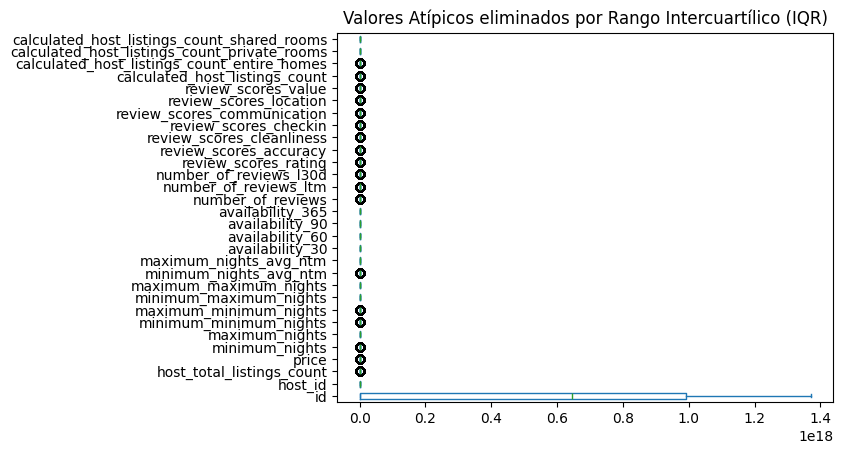

In [19]:
num = df_imp.select_dtypes(include=[np.number])

# Q1, Q3 e IQR
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

limite_superior_iqr = Q3 + 1.5 * IQR
limite_inferior_iqr = Q1 - 1.5 * IQR

print('Límite superior permitido (IQR):')
print(limite_superior_iqr)
print('\nLímite inferior permitido (IQR):')
print(limite_inferior_iqr)

df_outliers_iqr = num[(num <= limite_superior_iqr) & (num >= limite_inferior_iqr)]

# Cuántos valores nulos quedan
print('\nValores nulos tras eliminar outliers (IQR):')
print(df_outliers_iqr.isnull().sum())

plt.figure(figsize=(15, 8))
df_outliers_iqr.plot(kind='box', vert=False)
plt.title('Valores Atípicos eliminados por Rango Intercuartílico (IQR)')
plt.show()

In [292]:
df_atipicos = df_outliers_iqr
df_atipicos.to_csv('Valores_Atipicos.csv', index=False)